<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [30]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score



import warnings



## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [31]:
data = pd.read_csv(r'C:\Users\Administrator\Downloads\car_prices.csv')
data.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


The dataset used in this analysis consists of car prices and their associated attributes. It includes 3,722 entries with the following features:
car_id, price, fuel type, gear type, Make, Model, Year of manufacture, Colour, Condition, Mileage, Engine Size,Selling Condition, Bought Condition, car, Trim, Drivetrain, Seats, Number of Cylinders, The number of cylinder, Horse Power,
Registered city.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
 13  car                  1767 non-null   object 
 14  Trim                 879 non-null    object 
 15  Drivetrain           838 non-null    o

# Data Exploration and Cleaning


Initial exploration revealed missing values and outliers in several columns. The following steps were taken for data cleaning and feature engineering:

* Outlier Handling: Outliers were detected using the IQR method and replaced with NaN values.
* Missing Values Imputation:
   Numerical columns were filled with their median values, 
   categorical columns were filled with the string 'missing'.
* Skewness Correction: Skewed numerical features were transformed using np.log1p.
* Feature Drop: The car_id column was dropped as it is a unique identifier with no predictive power.

In [33]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
data = data.mask(outliers, np.nan)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10272\781417253.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))


In [34]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

In [35]:
skewness = data[numerical_cols].apply(lambda x: x.skew())
skewed_cols = skewness[abs(skewness) > 0.75].index
data[skewed_cols] = np.log1p(data[skewed_cols])

In [36]:
data = data.fillna('missing')

In [37]:
data= data.drop(['car_id'], axis=1)

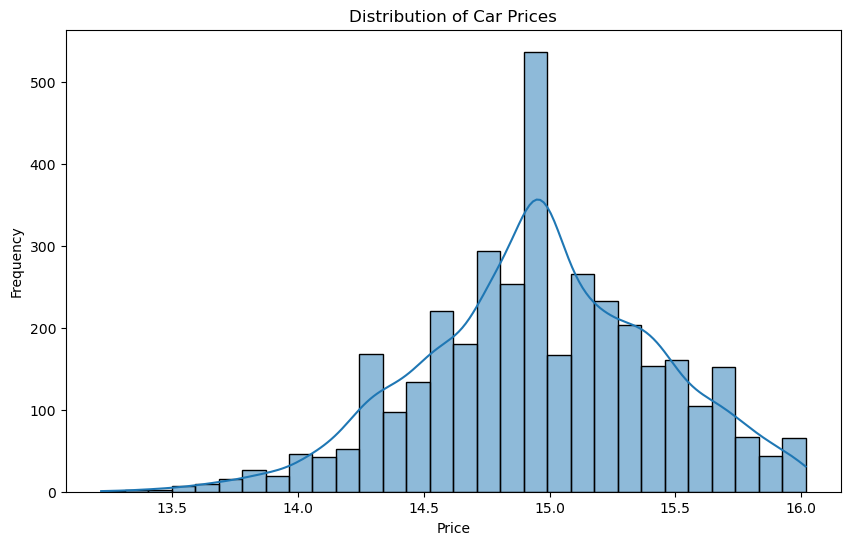

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

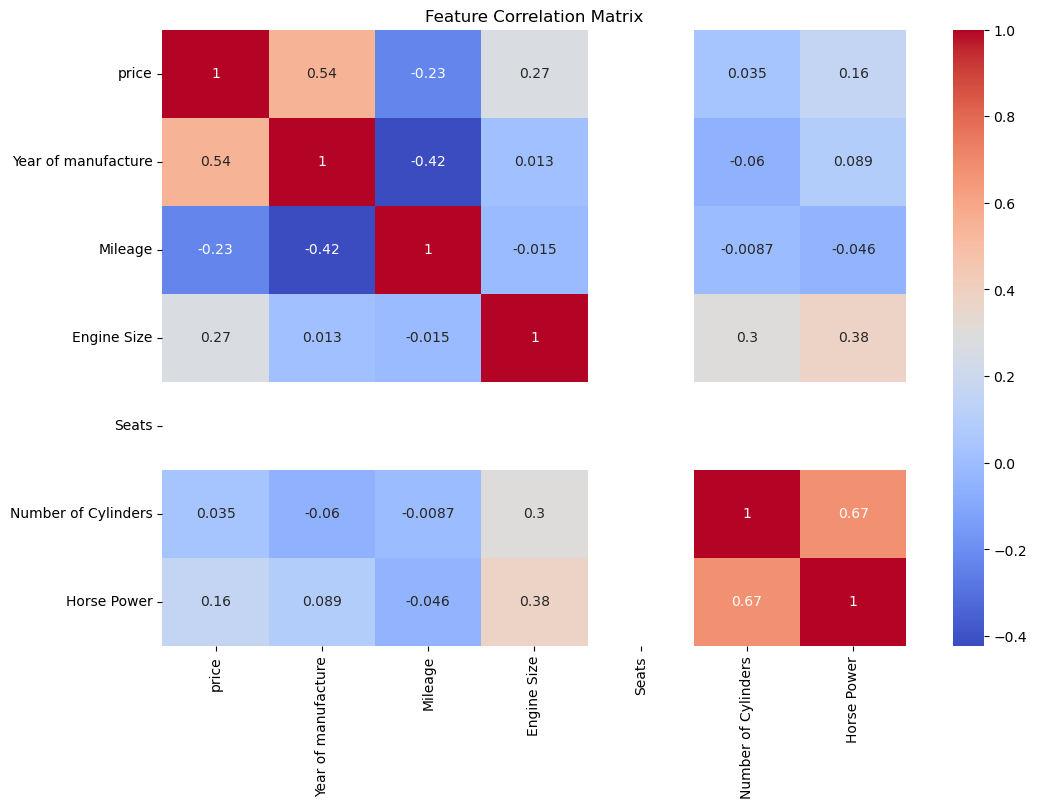

In [39]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# 2. Objectives


The primary objective of this analysis is to predict car prices using various linear regression models. The focus is on evaluating model performance and determining the best model for accurate predictions and insightful interpretation of the data.

# 3. Linear Regression Models


# Model Training 
The dataset was split into training and test sets using an 80/20 split. Five regression models were trained and evaluated:

* Simple Linear Regression: Used as a baseline model.
* Polynomial Regression: Included polynomial features of degree 2 to capture non-linear relationships.
* Lasso Regression: A regularized regression model using L1 penalty.
* Ridge Regression: A regularized regression model using L2 penalty.
* Elastic Net Regression: A regularized regression model combining L1 and L2 penalties.





In [40]:
X = data.drop(['price'], axis=1)
y = data['price']

In [41]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


In [42]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [44]:
models = {
    'Simple Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    'Polynomial Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', LinearRegression())
    ]),
    'Lasso Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('model', Lasso(max_iter=10000))
    ]),
    'Ridge Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('model', Ridge(max_iter=10000))
    ]),
    'Elastic Net Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('model', ElasticNet(max_iter=10000))
    ])
}

# Hyperparameter Tuning
Grid search with cross-validation was used to find the best hyperparameters for Lasso, Ridge, and Elastic Net regressions. The GridSearchCV function was used to evaluate different combinations of alpha values and l1_ratio for Elastic Net.

In [45]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    'Lasso Regression': {'model__alpha': [0.1, 1.0, 10.0, 100.0]},
    'Ridge Regression': {'model__alpha': [0.1, 1.0, 10.0, 100.0]},
    'Elastic Net Regression': {'model__alpha': [0.1, 1.0, 10.0, 100.0], 'model__l1_ratio': [0.2, 0.5, 0.8]}
}

In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross Validation

In [47]:
results = {}

In [48]:
for name, pipeline in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_model = pipeline
        best_model.fit(X, y)
        best_params = 'N/A'
    
    cv_rmse = np.sqrt(-cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1))
    cv_r2 = cross_val_score(best_model, X, y, cv=kf, scoring='r2', n_jobs=-1)
    cv_mae = -cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
    results[name] = {
        'RMSE': cv_rmse.mean(),
        'R-squared': cv_r2.mean(),
        'MAE': cv_mae.mean(),
        'Best Params': best_params
    }

In [ ]:

results_df = pd.DataFrame(results).T
print(results_df)

                              RMSE R-squared       MAE  \
Simple Linear Regression  0.322554  0.527464  0.235278   
Polynomial Regression     0.779572 -1.897036  0.407247   
Lasso Regression          0.400677  0.272881  0.323977   
Ridge Regression          0.303287  0.582203  0.228225   
Elastic Net Regression    0.349457  0.446488  0.279792   

                                                            Best Params  
Simple Linear Regression                                            N/A  
Polynomial Regression                                               N/A  
Lasso Regression                                  {'model__alpha': 0.1}  
Ridge Regression                                  {'model__alpha': 1.0}  
Elastic Net Regression    {'model__alpha': 0.1, 'model__l1_ratio': 0.2}  


In [ ]:
results_df[['RMSE', 'R-squared', 'MAE']].plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

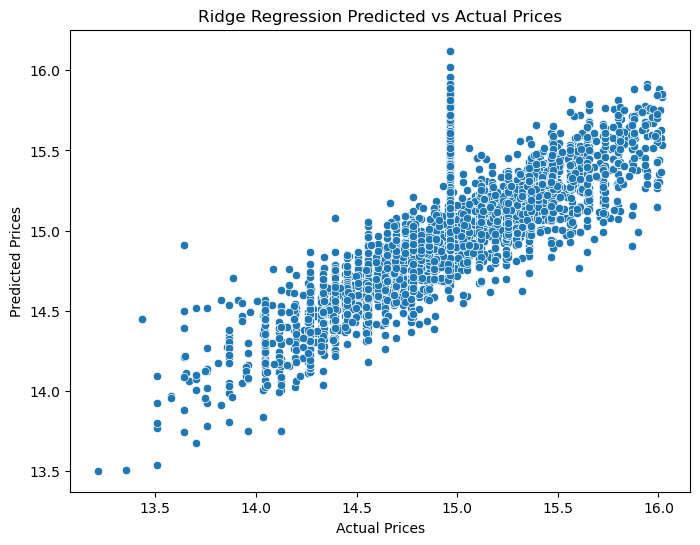

In [ ]:
model_name = 'Ridge Regression'
best_model = models[model_name]
best_model.fit(X, y)
y_pred = best_model.predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'{model_name} Predicted vs Actual Prices')
plt.show()

# Model Evaluation
The performance of each model was assessed using RMSE, R-squared, and MAE. Cross-validation was employed to ensure robust evaluation.

# Model Recommendation

Based on the evaluation metrics, Ridge Regression is recommended as the final model. It achieved the lowest RMSE (0.3033), indicating better prediction accuracy, and the highest R-squared value (0.5822), suggesting a better fit to the data compared to the other models. Ridge Regression also showed a relatively low MAE (0.2282), demonstrating its robustness in predicting car prices.

# 4. Insights and key findings


* Linear Relationships: Simple Linear Regression provided a reasonable baseline but was outperformed by Ridge Regression.
* Non-linear Effects: Polynomial Regression did not improve model performance and even showed a negative R-squared, indicating overfitting.
* Regularization Benefits: Regularized models (Ridge, Lasso, Elastic Net) provided better generalization. Ridge Regression emerged as the best due to its balance of bias and variance.

# 5. Next Steps


* Feature Engineering: Incorporate additional features or interaction terms to capture more complex relationships.
* Model Ensemble: Experiment with ensemble methods (e.g., Random Forest, Gradient Boosting) to potentially improve predictive performance.
* Data Collection: Collect more data to enhance model training and reduce overfitting.
* Hyperparameter Tuning: Explore more hyperparameter configurations to further optimize model performance.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
